The primary focus of this project is to show a numerical solution to the Lorenz equations, which is a set of differential equations that helped to evolve the study of deterministic chaos [3]. To help introduce the idea of deterministic chaos the project will begin by examing the solution to a dampened driven nonlinear pendulum. Then we will look at the solution to the Lorenz equations and try to enterprate their meaning.

The dampened driven nonlinear pendulum we will be looking at has a frictional force component proportional to the velocity and a sinusoidal driving force. These are arbitrary choices for the frictional force and driving force, and were chosen for their interesting behaviour. To derive the equation of motion we begin by looking at the sum of the forces applied to the pendulum. We can start by breaking up the sum of the forces into the horizontal and vertical directions.

\begin{equation*}
\sum F_\theta = \sum F_H + \sum F_V.
\end{equation*}

In the horizontal direction we have the driving force ($F_D$) which will be a time dependant force with a frequency of $\Omega_D$. Considering this force is sinusuidal the sign of this force is based upon the starting conditions and can be altered by adding or subtracting a certain amount to the initial time, as such we will assume this force to be a positive addition to the force. The driving force can be written as

\begin{equation*}
F_D \sin (\Omega_d t),
\end{equation*}

where $F_d$ is the magnitude of the force. The frictional force is assumed to be proportional to the pendulum's velocity and can thus be written as

\begin{equation*}
F_F \frac{d\theta}{dt},
\end{equation*}

where $F_f$ is the magnitude of the force. Since the frictional force will always be in the opposite direction of the motion, this force component will be subtracted from the overall forces. In the vertical direction the only force is that due to gravity. This restoring force is dependant upon the angle of displacement from the vertical axis and is given by

\begin{equation*}
mg\sin(\theta).
\end{equation*}

As in the case of the frictional force, the gravitational force will be opposite that of the pendulum's motion, and as such the force will be subtracted from the sum of the forces. That being said, summing all of forces results in the equation of motion

\begin{equation*}
F_\theta = -mg\sin(\theta) - F_F \frac{d\theta}{dt} + F_D \sin (\Omega_d t).
\end{equation*}

Rewriting this using Newton's second law we get

\begin{equation*}
ma = m \frac{d^2\theta}{dt^2} = -mg\sin(\theta) - F_F \frac{d\theta}{dt} + F_D \sin (\Omega_d t).
\end{equation*}

Dividing through by $m$ and absorbing $1/m$ into $F_F$ and $F_D$ we can rewrite this equation in it's final form

\begin{equation*}
\frac{d^2\theta}{dt^2} = -g\sin(\theta) - F_f \frac{d\theta}{dt} + F_d \sin (\Omega_d t),
\end{equation*}

where $F_f = F_F/m$ and $F_d = F_D/m$.


\begin{equation*}

\end{equation*}

## Equations

#### Lorenz 
\begin{equation*}
\frac{dx}{dt} = \sigma (y - x) \\ 
\frac{dy}{dt} = x (\rho - z) - y \\
\frac{dz}{dt} = xy - \beta z
\end{equation*}

#### Dampened Driven Nonlinear Pendulum
\begin{equation*}
\frac{d^2\theta}{dt^2} = -\frac{g}{l} \sin (\theta) - F_f \frac{d\theta}{dt} + F_d \sin (\Omega_d t)
\end{equation*}

**References:**

[1] Newman  
[2] Giordano  
[3] Muthuramalingam, Rasi. (2013). ANALYTICAL SOLUTION OF LORENZ EQUATION USING HOMOTOPY ANALYSIS METHOD. 
Journal of Global Research in Mathematical Archives. 1. 14. 
https://www.researchgate.net/publication/273641652_ANALYTICAL_SOLUTION_OF_LORENZ_EQUATION_USING_HOMOTOPY_ANALYSIS_METHOD  


In [67]:
import numpy as np
import pylab as plt
from scipy.integrate import odeint
from RungeKutta import vectorRungeKutta as rk
import turtle
%matplotlib inline

In [79]:
def nonlinearOscillator (r, t, g, l, F_f, F_d, omega_d):
    omega, theta = r
    
    fomega = -g /l * np.sin (theta) - F_f * omega + F_d * np.sin (omega_d * t)
    ftheta = omega
    
    if np.pi < ftheta:
        ftheta + 2 * np.pi
    elif -np.pi > ftheta: 
        ftheta - 2 * np.pi
    
    return np.array ([fomega, ftheta], float)

def lorenzHAMApprox (r, t, r0, sigma, rho, beta, h):
    x, y, z = r
    x0, y0, z0 = r0
    
    fx = x0 - sigma * t (1 + h)
    fy = y0 - t * [1 + h (rho - 1)]
    fz = z0 - t * (beta + h)
    return np.array ([fx, fy, fz], float)

def lorenz (r, t, state):
    x, y, z = r
    sigma, rho, beta = state
    
    fx = sigma * (y - x)
    fy = x * (rho - z) - y
    fz = x * y - beta * z
    
    return np.array ([fx, fy, fz], float)

def lorenzSolution (r0, interval, steps, state):
    numIndepVars = 3
    return rk (lorenz, numIndepVars, r0, interval, steps, state, order = 4)

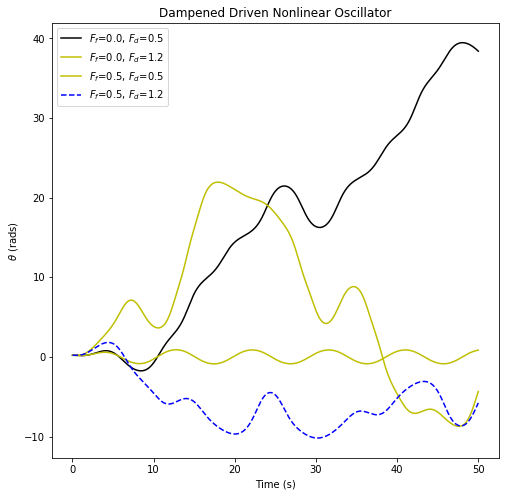

In [80]:
if "__main__" == __name__:

    styles = ["-k", "-y", "--b", "--o"]
    
    #set Runge-Kutta argument values
    interval = (0, 50)
    steps = 10000
    order = 4
    numIndepVars = 2
    
    #set initial pendulum values
    g = 9.8
    l = 9.8
    F_f = [0.0, 0.5] 
    F_d = [0.5, 1.2]
    omega_d = 2/3
    r0 = (0.0, 0.2) #omega, theta
    
    #set figure size, and establish initial plot
    plt.figure(figsize=(8, 8))
    ax = plt.subplot (111)
    
    #plot each figure
    for i in range (len (F_f)):
        for j in range (len (F_d)):
            
            #solve for the oscillator values
            solution = rk (nonlinearOscillator, numIndepVars, r0, interval, steps, g, l, F_f[i], F_d[j], omega_d, order = 4)

            ax.set_xlabel ("Time (s)")
            ax.set_ylabel (r"$\theta$ (rads)")
            ax.set_title ("Dampened Driven Nonlinear Oscillator")
            ax.plot (solution[:,0], solution[:,2], styles[i + j], label = r"$F_f$={}, $F_d$={}".format (F_f[i], F_d[j]))

    plt.legend()
    plt.show()

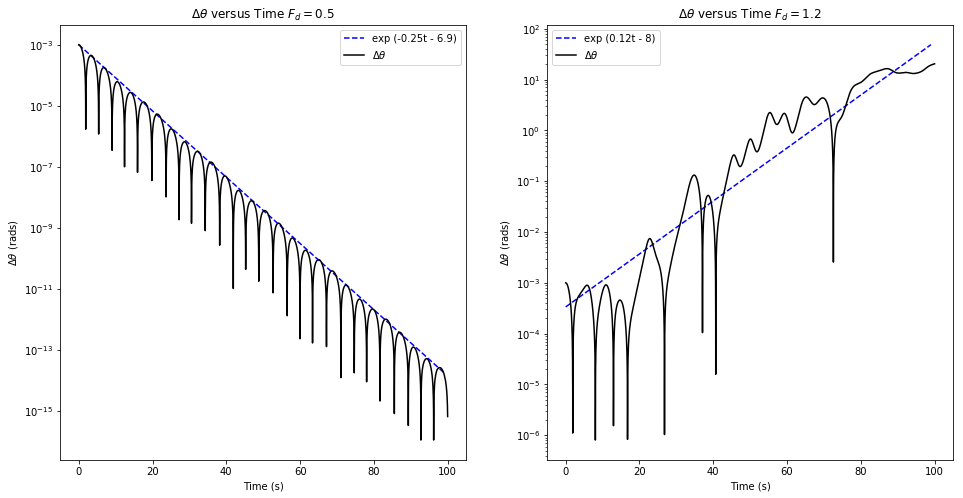

In [78]:
if "__main__" == __name__:

    #set Runge-Kutta argument values
    interval = (0, 100)
    steps = 10000
    order = 4
    numIndepVars = 2
    
    #set initial pendulum values
    g = 9.8
    l = 9.8
    F_f = 0.5
    F_d = [0.5, 1.2]
    omega_d = 2/3
    r0 = (0.0, 0.2) #omega, theta

    #set intial Lyapunov exponent values
    xValues = np.arange (interval[0], interval[1])
    alpha = [-0.25, 0.12]
    beta = [6.9, 8]
    
    plt.figure(figsize=(16, 8))
        
    for i in range (len (F_d)):
        
        #set Lyapunov exponent for pendulum
        yValues = []
        for x in xValues:
            yValues.append (np.exp (alpha[i] * x - beta[i]))

        #solve pendulum values for starting conditions differing by only 0.001 radians
        solution = rk (nonlinearOscillator, numIndepVars, r0, interval, steps, g, l, F_f, F_d[i], omega_d, order = 4)
        r0 = (r0[0], r0[1] + 0.001)
        solution2 = rk (nonlinearOscillator, numIndepVars, r0, interval, steps, g, l, F_f, F_d[i], omega_d, order = 4)

        #create set with the solution's differences
        diff = solution2 - solution

        #set up plot
        ax = plt.subplot(1, 2, i + 1)
        ax.set_xlabel("Time (s)")
        ax.set_ylabel(r"$\Delta\theta$ (rads)")
        ax.set_title (r"$\Delta\theta$ versus Time $F_d=${}".format (F_d[i]))

        #plot the difference in theta and the Lyapunov exponent solution
        plt.semilogy (xValues, yValues, "--b", label = "exp ({}t - {})".format (alpha[i], beta[i]))
        plt.semilogy(solution[:,0], abs(diff[:,2]), "-k", label = r"$\Delta\theta$")
  
        plt.legend()
    plt.show ()

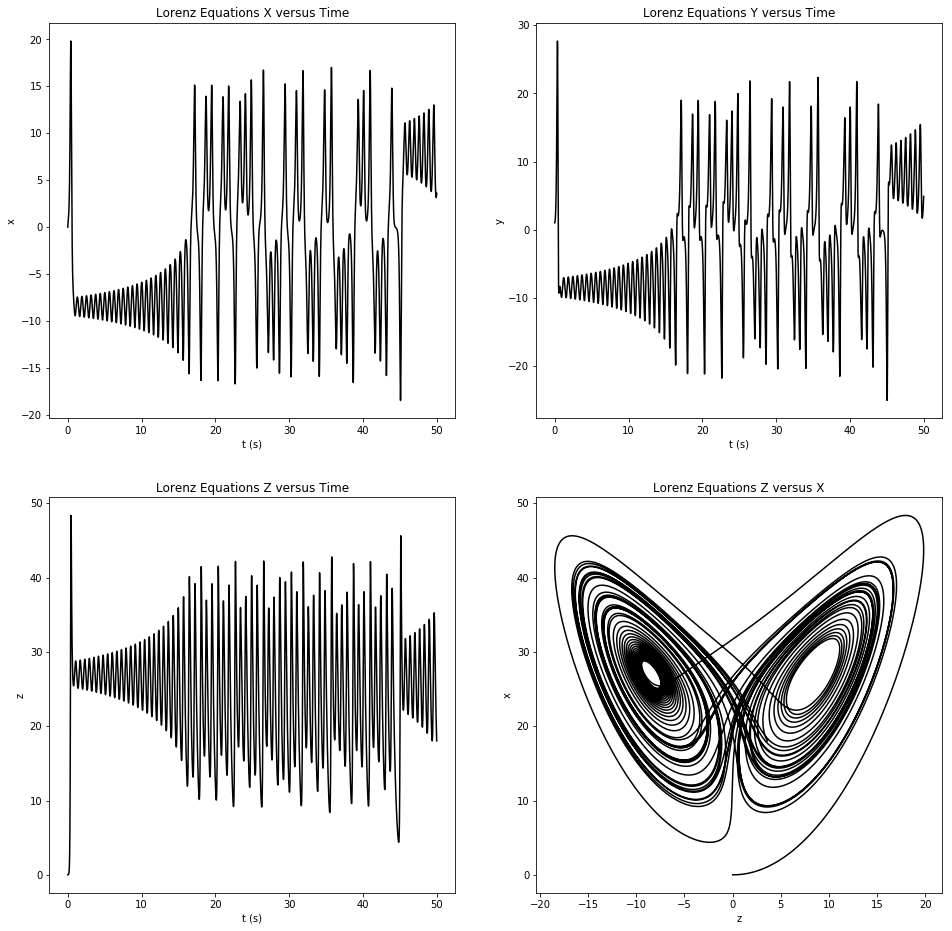

In [19]:
if __name__ == "__main__":
    sigma = 10.0
    rho = 28.0
    beta = 8.0 / 3.0
    state = (sigma, rho, beta)
    r0 = (0, 1, 0)
    
    interval = (0, 50)
    steps = 100000
    
    solution = lorenzSolution (r0, interval, steps, state)
    
    #set up plot
    plt.figure(figsize=(16, 16))
    
    # x vs time
    ax = plt.subplot(221)
    ax.set_xlabel("t (s)")
    ax.set_ylabel("x")
    ax.set_title ("Lorenz Equations X versus Time")
    plt.plot(solution[:,0], solution[:,1], "-k")
    
    # y vs time
    ax = plt.subplot(222)
    ax.set_xlabel("t (s)")
    ax.set_ylabel("y")
    ax.set_title ("Lorenz Equations Y versus Time")
    plt.plot(solution[:,0], solution[:,2], "-k")
    
    # z vs time
    ax = plt.subplot(223)
    ax.set_xlabel("t (s)")
    ax.set_ylabel("z")
    ax.set_title ("Lorenz Equations Z versus Time")
    plt.plot(solution[:,0], solution[:,3], "-k")
    
    # x vs z
    ax = plt.subplot(224)
    ax.set_xlabel("z")
    ax.set_ylabel("x")
    ax.set_title ("Lorenz Equations Z versus X")
    plt.plot(solution[:,1], solution[:,3], "-k")
    
    plt.show ()

    

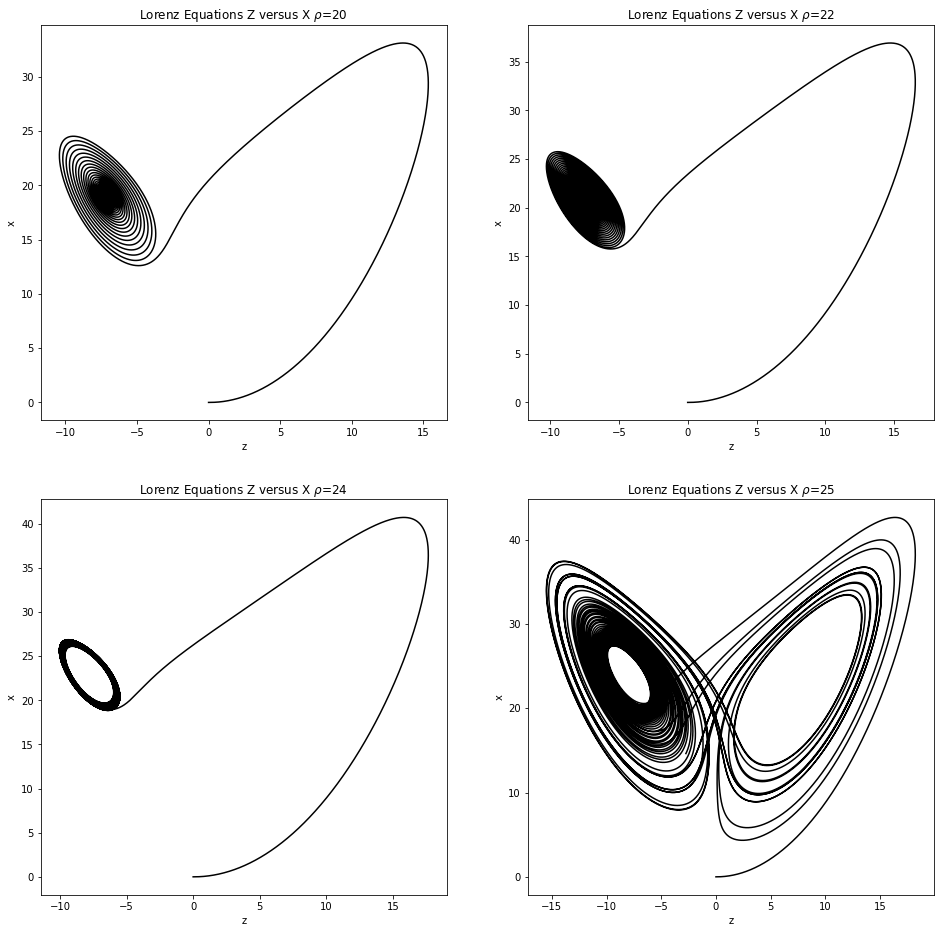

In [20]:
if __name__ == "__main__":
    sigma = 10.0
    rho = [20, 22, 24, 25]
    beta = 8.0 / 3.0
    r0 = (0, 1, 0)
    
    interval = (0, 50)
    steps = 100000
    
    #set up plot
    plt.figure(figsize=(16, 16))
    
    for i in range (len (rho)):
        state = (sigma, rho[i], beta)

        solution = lorenzSolution (r0, interval, steps, state)

        # x vs z
        ax = plt.subplot(2, 2, i + 1)
        ax.set_xlabel("z")
        ax.set_ylabel("x")
        ax.set_title (r"Lorenz Equations Z versus X $\rho$={}".format (rho[i]))
        plt.plot(solution[:,1], solution[:,3], "-k")

    
    plt.show ()


In [1]:
%%capture
import matplotlib.pyplot as mplt
import matplotlib.animation
import math

def amplitude (i):
    """
    Description: returns the amplitudes value for the specified time
    
    Parameters: i - ith time value at which the amplitudes being determined
    
    Returned: the amplitudes for the specified time
    
    Usage:
    x = tridiagonalGaussianElimination (A, v)
    t = np.linspace(0, 2*np.pi, N)
    print (amplitude (0))
    [ 1.41948811  0.30649604 -1.01082673 -1.65426501 -1.19485995  0.06111841
      1.27635116  1.64068314  0.91122636 -0.42571466 -1.47884591 -1.54607988
     -0.58259394  0.76928797  1.60831123  1.375127    0.22519144 -1.07487175
     -1.65835377 -1.13626661  0.14333162  1.32737544  1.6265023   0.84129429
     -0.50477658 -1.51432973]
    """
    return x * math.cos (omega * t[i])

def animate(i):
    """
    Description: sets the data set values to the amplitudes at the specified time
    
    Parameters: i - ith time value
    
    Returned: none
    
    Usage:
    A, v = vibratingSprings (N, C, m, k, omega)
    x = tridiagonalGaussianElimination (A, v)
    N1 = np.linspace(0, N, N)  #where N=number of oscillators
    t = np.linspace(0, 2*np.pi, N)

    fig, ax = plt.subplots()
    h = ax.axis([0,N,-2,2])
    l, = ax.plot(N1, amplitude (0), "--ko")
    animate (i)
    """
    l.set_data(N1, amplitude (i))

# Constants
N = 26
C = 1.0
m = 1.0
k = 6.0
omega = 2.0

A, v = vibratingSprings (N, C, m, k, omega)
x = tridiagonalGaussianElimination (A, v)
N1 = np.linspace(0, N, N)  #where N=number of oscillators
t = np.linspace(0, 2*np.pi, N)

fig, ax = mplt.subplots()
h = ax.axis([0,N,-2,2])
l, = ax.plot(N1, amplitude (0), "--ko")

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

NameError: name 'vibratingSprings' is not defined

In [7]:
def animate (i):
    x = [0]
    y = x
    axis.clear ()
    axis.plot (x, y)
    
interval = (-20, 20)
frames = 10
#set up plot
#plt.figure(figsize=(16, 16))

fig, axis = mplt.subplots()
axis.set_title ("Z verus X")
axis.set_xlabel ("x")
axis.set_ylabel ("z")
h = axis.axis ([-20, 20, 0, 50])
ani = matplotlib.animation.FuncAnimation (fig, animate, frames = frames)
plt.show ()

ValueError: Image size of 121759x98976 pixels is too large. It must be less than 2^16 in each direction.

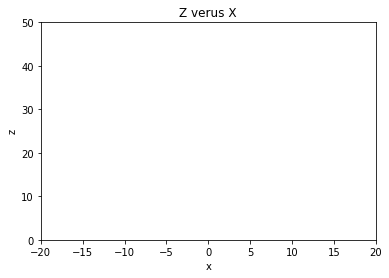

In [76]:
def animate (i):
    if (i < len (solution[:0])):
        xValues = solution[:i,1]
        yValues = solution[:i,3]
        axis.clear ()
        axis.plot (xValues[:], yValues[:])


sigma = 10.0
rho = 28
beta = 8.0 / 3.0
r0 = (0, 1, 0)

interval = (0, 50)
steps = 100000
state = (sigma, rho, beta)
solution = lorenzSolution (r0, interval, steps, state)
frames = 10
#set up plot
plt.figure(figsize=(16, 16))

fig, axis = mplt.subplots()
axis.set_title ("Z verus X")
axis.set_xlabel ("x")
axis.set_ylabel ("z")
h = axis.axis ([-20, 20, 0, 50])
ani = matplotlib.animation.FuncAnimation (fig, animate, frames = len (solution[:,0]))
plt.show ()

In [81]:


if "__main__" == __name__:
    
    window = turtle.Screen ()
    window.exitonclick ()
    lorenzTurtle = turtle.Turtle ()
    lorenzTurtle.speed (0)
    
    sigma = 10.0
    rho = 28
    beta = 8.0 / 3.0
    r0 = (0, 1, 0)

    interval = (0, 50)
    steps = 10000
    state = (sigma, rho, beta)
    solution = lorenzSolution (r0, interval, steps, state)
    xValues = solution[:,1]
    zValues = solution[:,3]
    
    #set initial position
    lorenzTurtle.setpos (xValues[0], zValues[0])
    
    for i in range (len (xValues)):
        lorenzTurtle.goto (xValues[i], zValues[i])
    


Terminator: 